In [1]:
# Regular Imports

import pandas
import numpy
import matplotlib.pyplot as pyplot
import seaborn

# We want our plots to be displayed in notebook

%matplotlib inline

# Processing the Data

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Modelling ML Algorithm

from sklearn.linear_model import LogisticRegression

# Evaluation

from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import f1_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
train = pandas.read_csv(r"https://raw.githubusercontent.com/karthik1401/NLP-Janata-Hackathon/master/train.csv")

In [3]:
train.head()

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1


In [4]:
train.shape

(17494, 5)

In [5]:
game_overview = pandas.read_csv(r'https://raw.githubusercontent.com/karthik1401/NLP-Janata-Hackathon/master/game_overview.csv')

In [6]:
game_overview.head()

,title,developer,publisher,tags,overview
0,Spooky's Jump Scare Mansion,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
1,Sakura Clicker,Winged Cloud,Winged Cloud,"['Nudity', 'Anime', 'Free to Play', 'Mature', ...",The latest entry in the Sakura series is more ...
2,WARMODE,WARTEAM,WARTEAM,"['Early Access', 'Free to Play', 'FPS', 'Multi...",Free to play shooter about the confrontation o...
3,Fractured Space,Edge Case Games Ltd.,Edge Case Games Ltd.,"['Space', 'Multiplayer', 'Free to Play', 'PvP'...",Take the helm of a gigantic capital ship and g...
4,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,"['FPS', 'Multiplayer', 'Shooter', 'Action', 'T...",Counter-Strike: Global Offensive (CS: GO) expa...


In [7]:
game_overview.shape

(64, 5)

In [8]:
train.head()

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1


In [9]:
train.describe()

,review_id,year,user_suggestion
count,17494.000000,17316.000000,17494.000000
mean,12423.216989,2016.388427,0.569795
std,7653.367660,1.390356,0.495119
min,1.000000,2011.000000,0.000000
25%,5769.250000,2015.000000,0.000000
50%,11756.500000,2017.000000,1.000000
75%,18926.750000,2018.000000,1.000000
max,25539.000000,2018.000000,1.000000


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17494 entries, 0 to 17493
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_id        17494 non-null  int64  
 1   title            17494 non-null  object 
 2   year             17316 non-null  float64
 3   user_review      17494 non-null  object 
 4   user_suggestion  17494 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 683.5+ KB


In [11]:
train.isna().sum()

review_id            0
title                0
year               178
user_review          0
user_suggestion      0
dtype: int64

In [12]:
train[train.isnull().any(axis = 1)]

,review_id,title,year,user_review,user_suggestion
1027,1028,Fractured Space,NaN,its really sad how this game ended. This game ...,1
1642,2106,Dota 2,NaN,"2 is one of the deepest, most satisfying and e...",1
1811,2275,Dota 2,NaN,has got to be one of the games with the worst ...,0
1814,2278,Dota 2,NaN,has long been a favorite game of mine. i have ...,0
1888,2352,Dota 2,NaN,is quick to ban racism from china but when rac...,0
...,...,...,...,...,...
17060,25029,Cuisine Royale,NaN,"Access ReviewNOT recomended 2play . Well , qui...",0
17073,25042,Cuisine Royale,NaN,Access ReviewQuite Possibly the worst BR game ...,0
17123,25092,Cuisine Royale,NaN,Access ReviewCant Playyyyyyyyyyyyyyyyyyyyyyyyy...,0
17492,25538,EverQuest II,NaN,cool game. THe only thing that REALLY PISSES M...,1


**We could find the year of the games by running a for loop through the df again. But, we can right now fill it with the mean year of 2016. Most of the listed games have the year listed.**

In [13]:
train['year'].fillna(2016, inplace = True)

In [14]:
train.isna().sum()

review_id          0
title              0
year               0
user_review        0
user_suggestion    0
dtype: int64

### We can build a model with Title and Review?

In [15]:
train.user_suggestion.value_counts()

1    9968
0    7526
Name: user_suggestion, dtype: int64

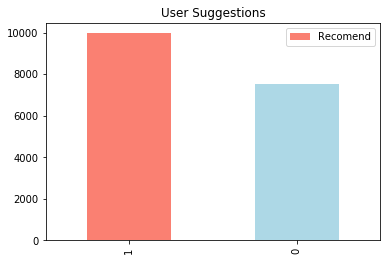

In [16]:
# Let's plot it for easier understanding
train.user_suggestion.value_counts().plot(kind = 'bar', 
                                          color = ['salmon', 'lightblue'])

# Customizing it
pyplot.title('User Suggestions')
pyplot.legend(['Recomend', 'Not Recomended']);

**So, the above plot makes it clear that data is partially balanced.**

In [17]:
# Writing our own custom function to sanitize it
def sanitize_reviews(df):
    df['user_review'] = df['user_review'].str.replace(r"http\S+", "")
    df['user_review'] = df['user_review'].str.replace(r"http", "")
    df['user_review'] = df['user_review'].str.replace(r"@\S+", "")
    df['user_review'] = df['user_review'].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df['user_review'] = df['user_review'].str.replace(r"@", "at")
    df['user_review'] = df['user_review'].str.lower()
    return df

In [18]:
train_san = sanitize_reviews(train)

In [19]:
train_san.head()

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,i'm scared and hearing creepy voices so i'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"best game, more better than sam pepper's youtu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"a littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"great game, fun and colorful and all that a si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,not many games have the cute tag right next to...,1


# Bag of Words Approach

In [20]:
def cv(data):
    # Instantiaitng the Vectorizer
    count_vectorizer = CountVectorizer()
    
    # Fitting the data
    emb = count_vectorizer.fit_transform(data)
    
    return emb, count_vectorizer

In [21]:
# Splitting the data into X & y
list_corpus = train_san['user_review'].tolist() # X
list_labels = train_san['user_suggestion'].tolist() #y

# Splitting the data into Train & Test
X_train, X_test, y_train, y_test = train_test_split(list_corpus, 
                                                    list_labels, 
                                                    test_size = 0.2,
                                                   random_state = 40)

# Vectorizing the data, running it through custom function
X_train_counts, count_vectorizer = cv(X_train)

# Fitting the data
X_test_counts = count_vectorizer.transform(X_test)

### Fitting a Logistic Regression Classifier

In [22]:
clf = LogisticRegression(C = 1, 
                         class_weight = 'balanced', 
                         n_jobs = -1, 
                         multi_class = 'multinomial', 
                        random_state = 42)

clf.fit(X_train_counts, y_train)

y_predicted_counts = clf.predict(X_test_counts)

### Evaluation

In [23]:
accuracy = accuracy_score(y_test, y_predicted_counts)
accuracy

0.8482423549585596

In [24]:
def plot_conf_mat(conf_mat, 
                  normalize = False,
                 classes = ['Not Recomended', 'Recomended']):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    if normalize:
        conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, numpy.newaxis]
        
    fig, ax = pyplot.subplots(figsize = (10, 10))
    ax = seaborn.heatmap(conf_mat, annot=True, cbar = 'False') # Annotate the boxes with conf_mat info
    
    # Customize
    pyplot.title(classes)
    pyplot.xlabel('True Label')
    pyplot.ylabel('Predicted Label');

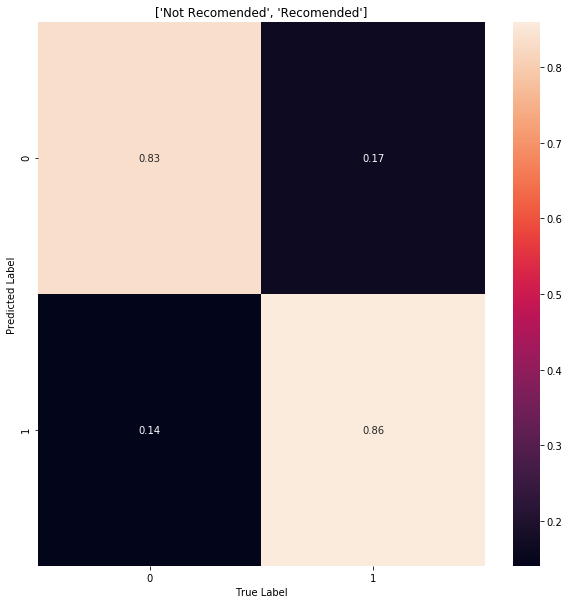

In [25]:
conf_mat = confusion_matrix(y_test, y_predicted_counts)
plot_conf_mat(conf_mat, True)


In [26]:
recall = recall_score(y_test, y_predicted_counts)
recall

0.8590840463009562

In [27]:
f1 = f1_score(y_test, y_predicted_counts)
f1

0.8653992395437263

In [28]:
report = classification_report(y_test, y_predicted_counts)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1512
           1       0.87      0.86      0.87      1987

    accuracy                           0.85      3499
   macro avg       0.85      0.85      0.85      3499
weighted avg       0.85      0.85      0.85      3499



### Further Inspection

In [29]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(count_vectorizer, clf, 10)

In [30]:
importance

{0: {'tops': [(0.8892984447662151, 'highly'),
   (0.9048720079576621, 'satisfying'),
   (0.9064937491817899, 'complaining'),
   (0.907262384495048, 'night'),
   (0.9153875790772552, 'fantastic'),
   (0.938088134623737, 'hats'),
   (0.9381343388351084, 'intense'),
   (0.9408714816415166, '11'),
   (0.9901175510033263, 'imo'),
   (1.4485233868730356, 'addictive')],
  'bottom': [(-1.080023331021814, 'uninstall'),
   (-1.0938681506922383, 'gaijin'),
   (-1.0952929458929983, 'sad'),
   (-1.1374243442990337, 'awful'),
   (-1.1902264005716376, 'ridiculous'),
   (-1.190277344582793, 'delete'),
   (-1.2045876324014684, 'worse'),
   (-1.2332388516716963, 'worst'),
   (-1.2868814422981623, 'garbage'),
   (-1.4122111111028919, 'unplayable')]}}

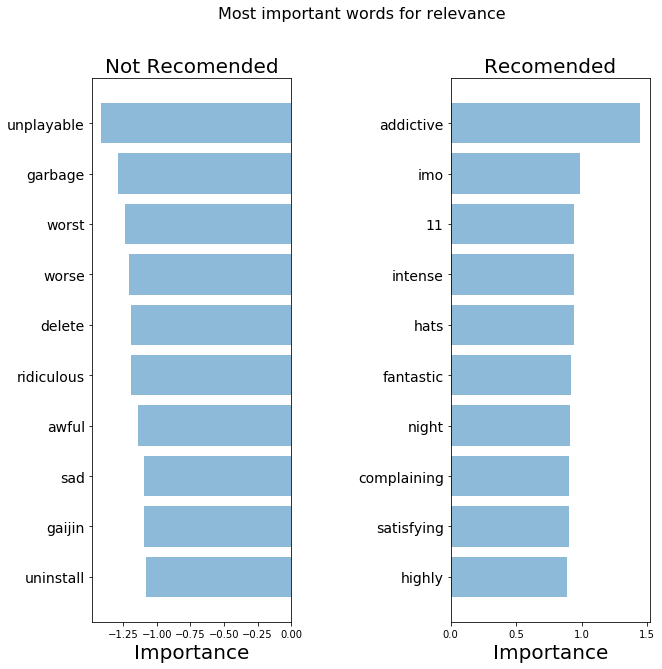

In [31]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = numpy.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = pyplot.figure(figsize=(10, 10))  

    pyplot.subplot(121)
    pyplot.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    pyplot.title('Not Recomended', fontsize=20)
    pyplot.yticks(y_pos, bottom_words, fontsize=14)
    pyplot.suptitle('Key words', fontsize=16)
    pyplot.xlabel('Importance', fontsize=20)
    
    pyplot.subplot(122)
    pyplot.barh(y_pos,top_scores, align='center', alpha=0.5)
    pyplot.title('Recomended', fontsize=20)
    pyplot.yticks(y_pos, top_words, fontsize=14)
    pyplot.suptitle(name, fontsize=16)
    pyplot.xlabel('Importance', fontsize=20)
    
    pyplot.subplots_adjust(wspace=0.8)
    pyplot.show()

top_scores = [a[0] for a in importance[0]['tops']]
top_words = [a[1] for a in importance[0]['tops']]
bottom_scores = [a[0] for a in importance[0]['bottom']]
bottom_words = [a[1] for a in importance[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, 
                     "Most important words for relevance")

### Hyperparameter Tuning using GridSearchCV()

In [93]:
logit_grid = {'C' : [0.001, 0.01, 0.1, 1, 10]}

In [94]:
numpy.random.seed(20)

clf = LogisticRegression(n_jobs = -1, 
                        multi_class = 'multinomial',
                       class_weight = 'balanced',
                         solver = 'newton-cg',
                       random_state = 42,
                        penalty = 'l2')

gs_clf = GridSearchCV(estimator = clf, 
                     param_grid = logit_grid,
                     cv = 5,
                     verbose = 2)

gs_clf.fit(X_train_counts, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......................................... C=0.001, total=   3.5s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


[CV] .......................................... C=0.001, total=   2.6s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   2.2s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   3.1s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   2.4s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   3.8s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   3.6s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   3.3s
[CV] C=0.01 ..........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  3.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100,
                                          multi_class='multinomial', n_jobs=-1,
                                          penalty='l2', random_state=42,
                                          solver='newton-cg', tol=0.0001,
                                          verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [96]:
gs_clf.best_params_

{'C': 0.1}

# Running this on test set

In [47]:
test = pandas.read_csv(r'https://raw.githubusercontent.com/karthik1401/NLP-Janata-Hackathon/master/test.csv')
test.head()

,review_id,title,year,user_review
0,1603,Counter-Strike: Global Offensive,2015.0,"Nice graphics, new maps, weapons and models. B..."
1,1604,Counter-Strike: Global Offensive,2018.0,I would not recommend getting into this at its...
2,1605,Counter-Strike: Global Offensive,2018.0,Edit 11/12/18I have tried playing CS:GO recent...
3,1606,Counter-Strike: Global Offensive,2015.0,The game is great. But the community is the wo...
4,1607,Counter-Strike: Global Offensive,2015.0,I thank TrulyRazor for buying this for me a lo...


### Pre-processing it

In [49]:
test.shape

(8045, 4)

In [50]:
test.isna().sum()

review_id       0
title           0
year           67
user_review     0
dtype: int64

In [51]:
test_san = sanitize_reviews(test)

In [52]:
test_san.head()

,review_id,title,year,user_review
0,1603,Counter-Strike: Global Offensive,2015.0,"nice graphics, new maps, weapons and models b..."
1,1604,Counter-Strike: Global Offensive,2018.0,i would not recommend getting into this at its...
2,1605,Counter-Strike: Global Offensive,2018.0,edit 11 12 18i have tried playing cs go recent...
3,1606,Counter-Strike: Global Offensive,2015.0,the game is great but the community is the wo...
4,1607,Counter-Strike: Global Offensive,2015.0,i thank trulyrazor for buying this for me a lo...


In [53]:
# Splitting the data into X & y
X = test_san['user_review'].tolist() # X

# Fitting the data
X_test_counts_2 = count_vectorizer.transform(X)

### Predicting for the Test Data

In [54]:
test['user_suggestion'] = gs_clf.predict(X_test_counts_2)

In [59]:
submission = test.drop(['title', 'year', 'user_review'], axis = 1)

In [60]:
submission.head()

,review_id,user_suggestion
0,1603,0
1,1604,0
2,1605,0
3,1606,0
4,1607,1


In [62]:
submission.to_csv('NLP Janata.csv', index = False)

## Building Tf-IDF on top of our Bag of Words Approach

In [63]:
def tfidf(data):
    # Instantiating the Vectorizer
    tfidf_vectorizer = TfidfVectorizer()
    
    # Fitting the data
    train = tfidf_vectorizer.fit_transform(data)
    
    return train, tfidf_vectorizer

In [64]:
# Vectorizing the training data
X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [97]:
# Building a Logistic Regression model with the TF-IDF data
clf2 = LogisticRegression(C = 1,
                        class_weight = 'balanced',
                        n_jobs = -1,
                        multi_class = 'multinomial',
                        random_state = 42,
                         penalty = 'l2')

# Fitting it to train data
clf2.fit(X_train_tfidf, y_train)

y_predicted_tfidf = clf2.predict(X_test_tfidf)

### Evaluation

In [98]:
accuracy2 = accuracy_score(y_predicted_tfidf, y_test)
accuracy2

0.8642469276936268

In [75]:
report2 = classification_report(y_predicted_tfidf, y_test)
print(report2)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1581
           1       0.86      0.89      0.88      1918

    accuracy                           0.86      3499
   macro avg       0.86      0.86      0.86      3499
weighted avg       0.86      0.86      0.86      3499



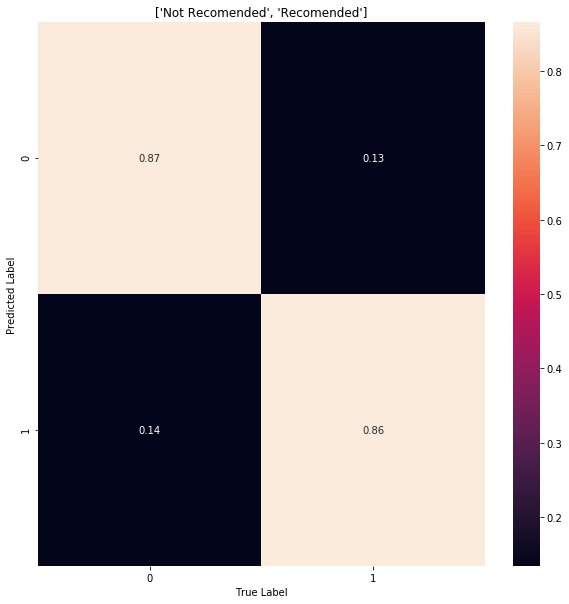

In [79]:
conf_mat2 = confusion_matrix(y_test, y_predicted_tfidf)
plot_conf_mat(conf_mat2, True)

## Our Model's Accuracy has increased!

**Hyperparameter Tuning using `GridSearchCV()`**

In [100]:
numpy.random.seed(20)

gs_clf2 = GridSearchCV(estimator = clf2,
                      param_grid = logit_grid,
                      cv = 5, 
                      verbose = 2)

gs_clf2.fit(X_train_tfidf, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......................................... C=0.001, total=   0.5s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] .......................................... C=0.001, total=   0.5s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.3s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.3s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.4s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.3s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.3s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.4s
[CV] C=0.01 ..........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   27.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100,
                                          multi_class='multinomial', n_jobs=-1,
                                          penalty='l2', random_state=42,
                                          solver='lbfgs', tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [102]:
gs_clf2.best_params_

{'C': 1}

### Predicting for the Test Data

In [103]:
# Splitting the data into X & y
X = test_san['user_review'].tolist() # X

# Fitting the data
X_test_tfidf_2 = tfidf_vectorizer.transform(X)

In [108]:
test['user_suggestion'] = gs_clf2.predict(X_test_tfidf_2)

In [111]:
submission = test.drop(['title', 'year', 'user_review', 'user_suggestion_TFIDF'], axis = 1)

In [112]:
submission.head()

,review_id,user_suggestion
0,1603,0
1,1604,0
2,1605,0
3,1606,0
4,1607,1


In [113]:
submission.to_csv('NLP Janata 2.csv', index = False)